In [82]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [83]:
df = pd.read_csv('Exp1.csv')

df_copy = df.copy()
df_copy.drop(['Run_ID', 'Experiment', 'Replica', 'Tool_ID', 'Group', 'Subgroup',
           'Condition', 'TCond',
           'Machined_length', 'Init_diameter', 'Final_diameter', 'CTime', 'R_measurement','Rsk','Rku','RSm','Rt','Fx','Fy','Fz','F','Rz'],axis=1, inplace=True)
print(df_copy.head())
print(df_copy.tail())

  Position    ap   vc  feed     Ra
0        a  0.25  350  0.07  0.391
1        a  0.25  350  0.07  0.359
2        a  0.25  350  0.07  0.421
3        a  0.25  350  0.07  0.450
4        a  0.25  350  0.07  0.360
    Position   ap   vc  feed     Ra
319        i  0.8  390   0.1  0.597
320        i  0.8  390   0.1  0.610
321        i  0.8  390   0.1  0.569
322        i  0.8  390   0.1  0.592
323        i  0.8  390   0.1  0.579


In [84]:
# Filtrowanie danych
filtered_df = df_copy[    (df_copy["Position"] == "a") &
    (df_copy["ap"] == 0.25) &
    (df_copy["vc"] == 350) &
    (df_copy["feed"] == 0.07)]

# pd wysweitla wszystko
pd.set_option('display.max_rows', None)

print(filtered_df)

  Position    ap   vc  feed     Ra
0        a  0.25  350  0.07  0.391
1        a  0.25  350  0.07  0.359
2        a  0.25  350  0.07  0.421
3        a  0.25  350  0.07  0.450
4        a  0.25  350  0.07  0.360
5        a  0.25  350  0.07  0.383


In [85]:
# Grupowanie po parametrach i uśrednianie Ra
aggregated_df = df_copy.groupby(["Position", "ap", "vc", "feed"], as_index=False)["Ra"].mean()

print(aggregated_df)

   Position    ap   vc  feed        Ra
0         a  0.25  350  0.07  0.394000
1         a  0.25  350  0.10  1.047833
2         a  0.50  310  0.10  0.907000
3         a  0.80  310  0.10  0.963000
4         a  0.80  350  0.07  0.377500
5         b  0.25  350  0.13  1.454583
6         b  0.50  310  0.07  0.269167
7         b  0.50  310  0.13  1.123833
8         b  0.80  310  0.07  0.652000
9         b  0.80  350  0.13  1.420500
10        c  0.25  350  0.07  0.633167
11        c  0.25  350  0.10  0.638500
12        c  0.50  310  0.07  0.449833
13        c  0.50  310  0.13  1.105167
14        c  0.80  310  0.13  0.928500
15        c  0.80  350  0.10  0.825833
16        d  0.25  390  0.10  0.717333
17        d  0.25  390  0.13  1.263833
18        d  0.50  310  0.10  0.517500
19        d  0.50  350  0.13  0.968000
20        d  0.80  350  0.07  0.569667
21        d  0.80  390  0.07  0.438667
22        e  0.25  390  0.10  0.931167
23        e  0.25  390  0.13  1.102833
24        e  0.50  350  0

In [ ]:
# Filtrowanie danych 
filtered_df_2 = aggregated_df[
    (aggregated_df["ap"] == 0.25)]

# pd wyswietla wszystkie wiersze
pd.set_option('display.max_rows', None)

print(filtered_df_2)

   Position    ap   vc  feed        Ra
0         a  0.25  350  0.07  0.394000
1         a  0.25  350  0.10  1.047833
5         b  0.25  350  0.13  1.454583
10        c  0.25  350  0.07  0.633167
11        c  0.25  350  0.10  0.638500
16        d  0.25  390  0.10  0.717333
17        d  0.25  390  0.13  1.263833
22        e  0.25  390  0.10  0.931167
23        e  0.25  390  0.13  1.102833
28        f  0.25  390  0.07  0.395833
33        g  0.25  310  0.10  0.772250
38        h  0.25  310  0.07  0.233833
39        h  0.25  310  0.13  1.167000
44        i  0.25  310  0.07  0.391333
45        i  0.25  310  0.13  0.829833


In [87]:
label_encoder = LabelEncoder()

#label pozycji
aggregated_df['Position_encoded'] = label_encoder.fit_transform(aggregated_df['Position'])

print(aggregated_df)

   Position    ap   vc  feed        Ra  Position_encoded
0         a  0.25  350  0.07  0.394000                 0
1         a  0.25  350  0.10  1.047833                 0
2         a  0.50  310  0.10  0.907000                 0
3         a  0.80  310  0.10  0.963000                 0
4         a  0.80  350  0.07  0.377500                 0
5         b  0.25  350  0.13  1.454583                 1
6         b  0.50  310  0.07  0.269167                 1
7         b  0.50  310  0.13  1.123833                 1
8         b  0.80  310  0.07  0.652000                 1
9         b  0.80  350  0.13  1.420500                 1
10        c  0.25  350  0.07  0.633167                 2
11        c  0.25  350  0.10  0.638500                 2
12        c  0.50  310  0.07  0.449833                 2
13        c  0.50  310  0.13  1.105167                 2
14        c  0.80  310  0.13  0.928500                 2
15        c  0.80  350  0.10  0.825833                 2
16        d  0.25  390  0.10  0

In [88]:
scaler = StandardScaler()
features_to_scale = ['ap', 'vc', 'feed']
scaled_features = scaler.fit_transform(aggregated_df[features_to_scale])
scaled_df = pd.DataFrame(scaled_features, columns=[f'{col}_scaled' for col in features_to_scale])
print(scaled_df)

    ap_scaled  vc_scaled   feed_scaled
0   -1.274236   0.000000 -1.224745e+00
1   -1.274236   0.000000  5.665583e-16
2   -0.146006  -1.224745  5.665583e-16
3    1.207870  -1.224745  5.665583e-16
4    1.207870   0.000000 -1.224745e+00
5   -1.274236   0.000000  1.224745e+00
6   -0.146006  -1.224745 -1.224745e+00
7   -0.146006  -1.224745  1.224745e+00
8    1.207870  -1.224745 -1.224745e+00
9    1.207870   0.000000  1.224745e+00
10  -1.274236   0.000000 -1.224745e+00
11  -1.274236   0.000000  5.665583e-16
12  -0.146006  -1.224745 -1.224745e+00
13  -0.146006  -1.224745  1.224745e+00
14   1.207870  -1.224745  1.224745e+00
15   1.207870   0.000000  5.665583e-16
16  -1.274236   1.224745  5.665583e-16
17  -1.274236   1.224745  1.224745e+00
18  -0.146006  -1.224745  5.665583e-16
19  -0.146006   0.000000  1.224745e+00
20   1.207870   0.000000 -1.224745e+00
21   1.207870   1.224745 -1.224745e+00
22  -1.274236   1.224745  5.665583e-16
23  -1.274236   1.224745  1.224745e+00
24  -0.146006   0.000000 

In [89]:
final_df = pd.concat([scaled_df, aggregated_df.drop(columns=features_to_scale)], axis=1)
print(final_df)

    ap_scaled  vc_scaled   feed_scaled Position        Ra  Position_encoded
0   -1.274236   0.000000 -1.224745e+00        a  0.394000                 0
1   -1.274236   0.000000  5.665583e-16        a  1.047833                 0
2   -0.146006  -1.224745  5.665583e-16        a  0.907000                 0
3    1.207870  -1.224745  5.665583e-16        a  0.963000                 0
4    1.207870   0.000000 -1.224745e+00        a  0.377500                 0
5   -1.274236   0.000000  1.224745e+00        b  1.454583                 1
6   -0.146006  -1.224745 -1.224745e+00        b  0.269167                 1
7   -0.146006  -1.224745  1.224745e+00        b  1.123833                 1
8    1.207870  -1.224745 -1.224745e+00        b  0.652000                 1
9    1.207870   0.000000  1.224745e+00        b  1.420500                 1
10  -1.274236   0.000000 -1.224745e+00        c  0.633167                 2
11  -1.274236   0.000000  5.665583e-16        c  0.638500                 2
12  -0.14600

In [1]:
print(df_copy)

NameError: name 'df_copy' is not defined

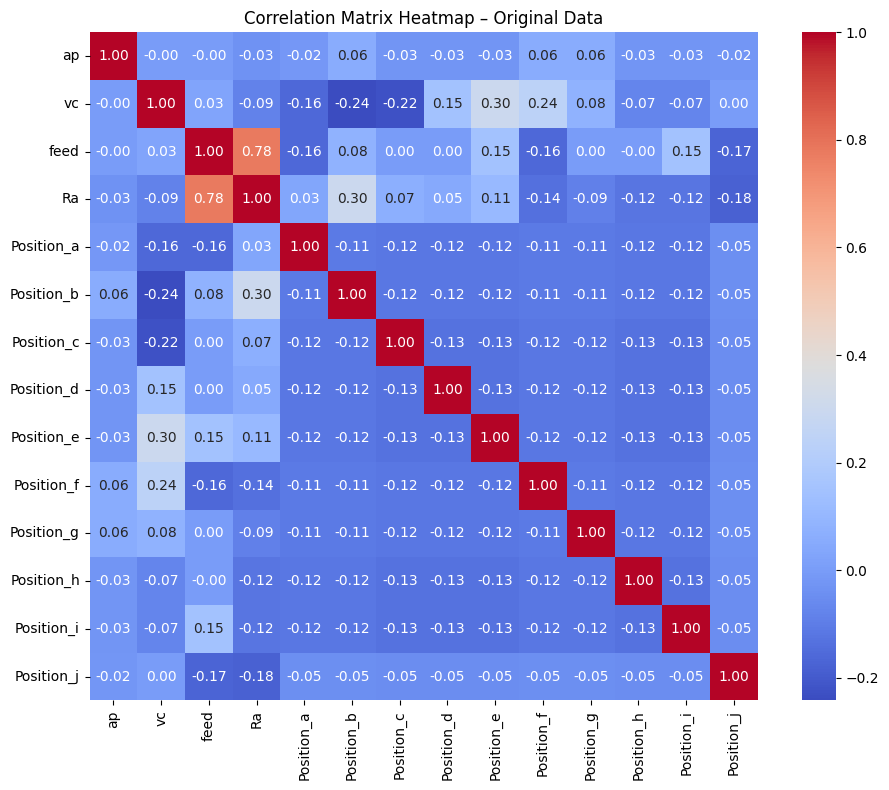

In [90]:
# correlation matrix on original (unscaled) data
corr_matrix_orig = df_encoded.corr()

# plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_orig, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap – Original Data")
plt.tight_layout()
plt.show()


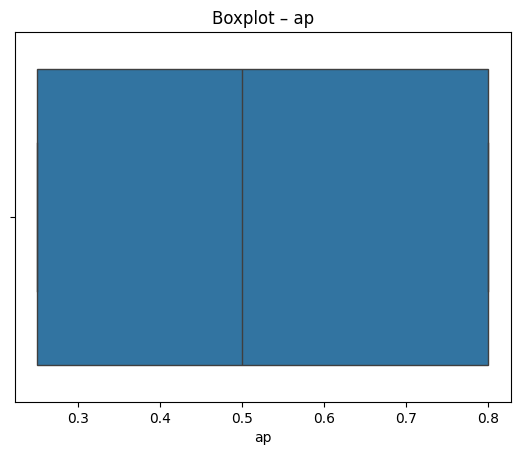

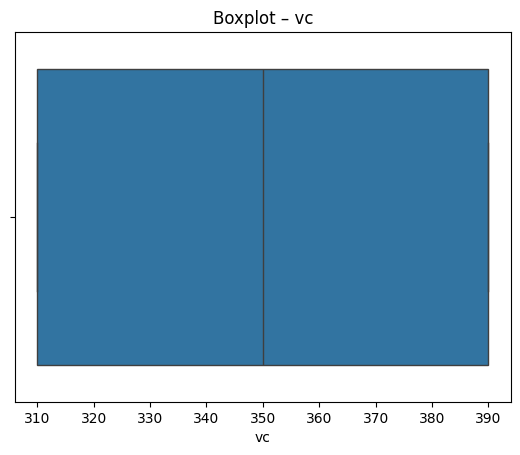

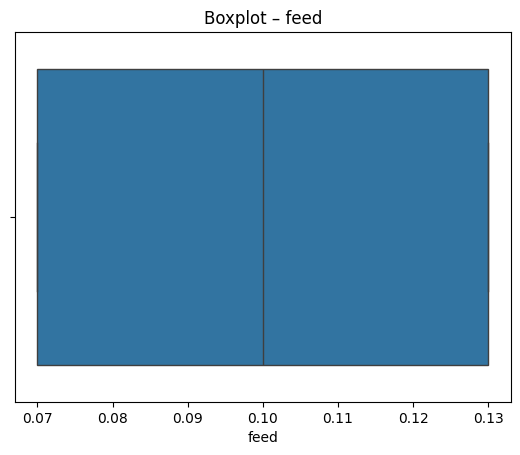

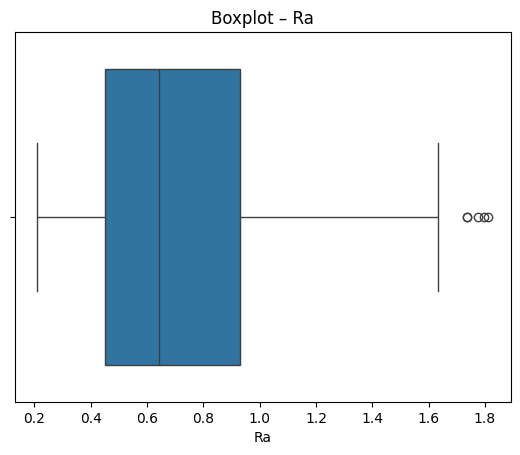

In [91]:
# wyszukiwanie outlierow
for col in ["ap", "vc", "feed", "Ra"]:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot – {col}")
    plt.show()

In [92]:
# skalowanie danych?
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[["ap", "vc", "feed"]])

In [93]:
# nowy df
df_scaled = pd.DataFrame(X_scaled, columns=["ap_scaled", "vc_scaled", "feed_scaled"])
df_scaled["Ra"] = df["Ra"].values

In [94]:
# zapis
conn = sqlite3.connect('SurfaceEXP1.db')  # dodaj rozszerzenie .db (zalecane)
df_scaled.to_sql('SurfaceEXP1', conn, if_exists='replace', index=False)
conn.close()